# Вычисление по схеме Горнера

In [1]:
from comp_pkg import GornerScheme

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
ticks = np.linspace(1.92, 2.08, num=1000)

coefs = [-512.0, 2304.0, -4608.0, 5376.0, -4032.0, 2016.0, -672.0, 144.0, -18.0, 1.0]

gorner = GornerScheme(coefficients=coefs)

values_gorner = gorner.solve(ticks)

values_classic = (ticks - 2) ** 9

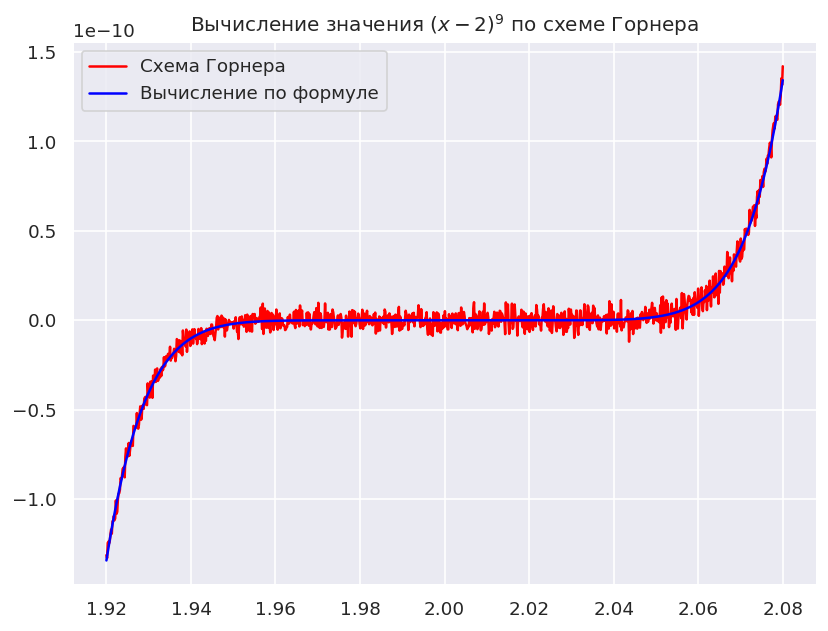

In [3]:
with sns.plotting_context('notebook'), sns.axes_style('darkgrid'):
    plt.figure(figsize=(8, 6), dpi=120)
    plt.plot(ticks, values_gorner, color='red', label='Схема Горнера')
    plt.plot(ticks, values_classic, color='blue', label='Вычисление по формуле')
    plt.title(r"Вычисление значения $(x - 2)^9$ по схеме Горнера")
    plt.legend(loc='best')
    plt.show()

Выкладки для расчета погрешности. Далее $\varepsilon$ - машинная точность, $V_M(x)$ - представление x, $|\delta| \leqslant \varepsilon$

\begin{equation}
    \begin{gathered}
        b_n = a_n, \\
        b_{n - 1} = a_{n - 1} + b_n x, \\
        V_M(b_{n - 1}) = a_{n - 1}(1 + \delta) + a_n x (1 + \delta)^2, \\
        \dots \\
        V_M(b_0) = a_n x^{2n} (1 + \delta)^{2n} + a_{n - 1} x^{2n - 1} (1 + \delta)^{2n - 1} + \dots + a_0 (1 + \delta), \\
        (1 + \delta)^{2n} = 1 + 2n\varepsilon + O(\varepsilon^2), \\
        (1 + \delta)^{2n} \geqslant 1 - 2n\varepsilon, \\
        |V_M(b_0) - b_0 | = 2n\varepsilon b_0 + O(\varepsilon^2)
    \end{gathered}
\end{equation}


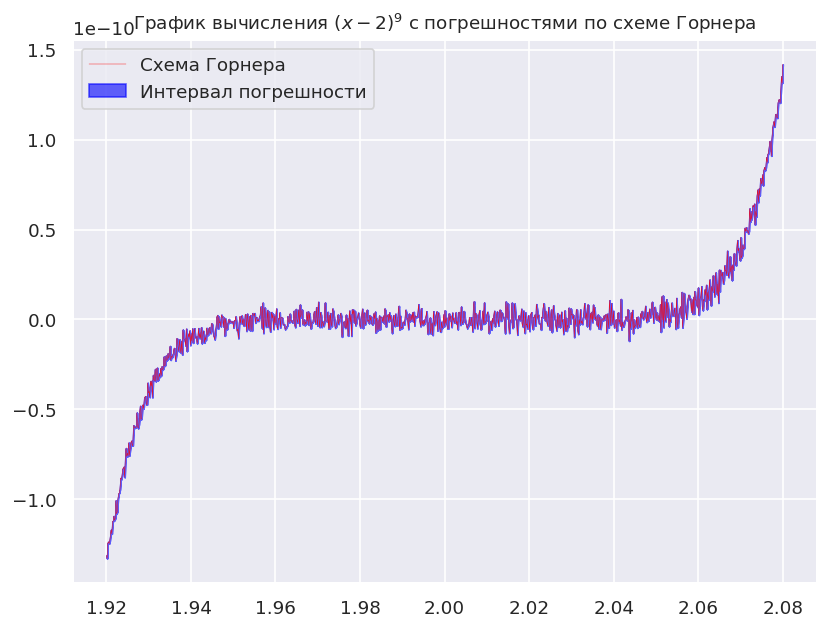

In [16]:
gorner_values, lower, upper = gorner.solve(ticks, with_erros=True, precision="single")

with sns.plotting_context('notebook'), sns.axes_style('darkgrid'):
    plt.figure(figsize=(8, 6), dpi=120)
    plt.plot(ticks, values_gorner, color='red', label='Схема Горнера', linewidth=0.25)
    
    plt.fill_between(ticks, lower, upper, color='blue', alpha=0.6, label='Интервал погрешности')

    plt.title(r"График вычисления $(x - 2)^9$ с погрешностями по схеме Горнера", fontsize=11)
    plt.legend(loc='best')
    plt.show()